# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [3]:
genome_ids = ['HG02839', 'HG02805', 'HG03259', 'HG02703', 'HG02613', 'HG03024', 'HG03039', 'HG02621', 'HG03538', 'HG02852', 'HG02643', 'HG02667', 'HG02461', 'HG02808', 'HG02465', 'HG02861', 'HG02676', 'HG02760', 'HG02771', 'HG02611', 'HG03045', 'HG03040', 'HG02715', 'HG02888', 'HG02982', 'HG02860', 'HG02589', 'HG02716', 'HG02594', 'HG02702', 'HG02679', 'HG02769', 'HG02890', 'HG02882', 'HG02895', 'HG03241', 'HG02851', 'HG02840', 'HG02623', 'HG02568', 'HG02620', 'HG02614', 'HG02583', 'HG03247', 'HG02635', 'HG02678', 'HG02817', 'HG02675', 'HG02807', 'HG03025', 'HG03258', 'HG02881', 'HG02595', 'HG02585', 'HG02722', 'HG02588', 'HG02887', 'HG02813', 'HG02561', 'HG02820', 'HG02816', 'HG02819', 'HG03028', 'HG02645', 'HG02642', 'HG02757', 'HG02721', 'HG02884', 'HG02646', 'HG02629', 'HG03539', 'HG02804', 'HG02885', 'HG03246', 'HG02763', 'HG02836', 'HG02879', 'HG03048', 'HG02810', 'HG02855', 'HG02574', 'HG02799', 'HG02854', 'HG02586', 'HG02573', 'HG02878', 'HG03027', 'HG02628', 'HG02666', 'HG02571', 'HG02570', 'HG03240', 'HG02891', 'HG02610', 'HG02811', 'HG02464', 'HG03049', 'HG02870', 'HG02798', 'HG02582', 'HG02624', 'HG02983', 'HG02562', 'HG03046', 'HG02759', 'HG02837', 'HG02634', 'HG02896', 'HG02462', 'HG02768', 'HG02814']

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [5]:
root_dir = join(Path.home(),"cp_als/populations")

In [6]:
infile = join(root_dir,"output/GWD/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/GWD/all.csv'

In [7]:
df = pd.read_csv(infile)

In [8]:
df = df[genome_ids + ['gene']]
df.head()

,HG02839,HG02805,HG03259,HG02703,HG02613,HG03024,HG03039,HG02621,HG03538,HG02852,...,HG02562,HG03046,HG02759,HG02837,HG02634,HG02896,HG02462,HG02768,HG02814,gene
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,1,0,1,1,1,0,1,1,...,1,0,1,1,0,0,1,0,1,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,0,0,1,0,1,1,1,0,1,1,...,1,0,1,1,0,0,1,0,1,TARDBP


## Computer variant count per gene and per genome

In [9]:
sdf=df.groupby(["gene"]).sum()

In [10]:
sdf.head()

,HG02839,HG02805,HG03259,HG02703,HG02613,HG03024,HG03039,HG02621,HG03538,HG02852,...,HG02983,HG02562,HG03046,HG02759,HG02837,HG02634,HG02896,HG02462,HG02768,HG02814
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,36,27,20,15,5,8,38,24,15,48,...,41,6,35,7,4,33,17,4,16,7
ANG,1,9,4,11,7,6,7,0,7,7,...,11,6,0,4,7,5,7,6,4,9
ATXN2,176,179,176,24,12,161,162,12,157,13,...,19,164,25,155,156,20,18,160,159,3
C19ORF12,20,49,20,18,14,19,53,16,18,19,...,13,14,47,9,19,14,20,10,12,49
C9ORF72,11,22,0,13,28,24,24,24,10,6,...,27,29,25,3,15,13,17,18,19,7


## Compute mean99

In [11]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [12]:
mean99.head()

,0
HG02839,21.434343
HG02805,25.222222
HG03259,22.020202
HG02703,21.797980
HG02613,21.555556


In [13]:
m99 = mean99.transpose()

In [14]:
m99

,HG02839,HG02805,HG03259,HG02703,HG02613,HG03024,HG03039,HG02621,HG03538,HG02852,...,HG02983,HG02562,HG03046,HG02759,HG02837,HG02634,HG02896,HG02462,HG02768,HG02814
0,21.434343,25.222222,22.020202,21.79798,21.555556,24.050505,22.444444,24.131313,21.393939,20.444444,...,19.333333,23.454545,23.969697,22.555556,19.525253,23.747475,21.080808,23.767677,24.484848,23.383838


## Name the row "mean99" to append to the dataframe 

In [15]:
m99.index=["mean99"]

In [16]:
m99.head()

,HG02839,HG02805,HG03259,HG02703,HG02613,HG03024,HG03039,HG02621,HG03538,HG02852,...,HG02983,HG02562,HG03046,HG02759,HG02837,HG02634,HG02896,HG02462,HG02768,HG02814
mean99,21.434343,25.222222,22.020202,21.79798,21.555556,24.050505,22.444444,24.131313,21.393939,20.444444,...,19.333333,23.454545,23.969697,22.555556,19.525253,23.747475,21.080808,23.767677,24.484848,23.383838


## Compute statistics per genome, across all genes

In [17]:
genome_stats= sdf.describe()

In [18]:
genome_stats.head()

,HG02839,HG02805,HG03259,HG02703,HG02613,HG03024,HG03039,HG02621,HG03538,HG02852,...,HG02983,HG02562,HG03046,HG02759,HG02837,HG02634,HG02896,HG02462,HG02768,HG02814
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,58.944444,69.361111,60.555556,59.944444,59.277778,66.138889,61.722222,66.361111,58.833333,56.222222,...,53.166667,64.500000,65.916667,62.027778,53.694444,65.305556,57.972222,65.361111,67.333333,64.305556
std,178.683750,220.317194,185.807649,191.377703,200.721927,206.694551,221.206640,235.515380,225.580458,187.275521,...,179.972617,218.931366,232.473332,184.679875,155.283670,225.435302,205.488336,225.809674,243.839994,235.001255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.750000,4.000000,4.750000,3.000000,5.500000,5.000000,...,3.750000,3.000000,3.000000,2.750000,3.000000,5.000000,4.750000,4.000000,3.750000,3.000000


### Adding new rows for genomes to show variant statistics

In [19]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [20]:
genome_stats_df

,HG02839,HG02805,HG03259,HG02703,HG02613,HG03024,HG03039,HG02621,HG03538,HG02852,...,HG02983,HG02562,HG03046,HG02759,HG02837,HG02634,HG02896,HG02462,HG02768,HG02814
ALS2,36.000000,27.000000,20.000000,15.000000,5.000000,8.000000,38.000000,24.000000,15.000000,48.000000,...,41.000000,6.000000,35.000000,7.000000,4.000000,33.000000,17.000000,4.000000,16.000000,7.000000
ANG,1.000000,9.000000,4.000000,11.000000,7.000000,6.000000,7.000000,0.000000,7.000000,7.000000,...,11.000000,6.000000,0.000000,4.000000,7.000000,5.000000,7.000000,6.000000,4.000000,9.000000
ATXN2,176.000000,179.000000,176.000000,24.000000,12.000000,161.000000,162.000000,12.000000,157.000000,13.000000,...,19.000000,164.000000,25.000000,155.000000,156.000000,20.000000,18.000000,160.000000,159.000000,3.000000
C19ORF12,20.000000,49.000000,20.000000,18.000000,14.000000,19.000000,53.000000,16.000000,18.000000,19.000000,...,13.000000,14.000000,47.000000,9.000000,19.000000,14.000000,20.000000,10.000000,12.000000,49.000000
C9ORF72,11.000000,22.000000,0.000000,13.000000,28.000000,24.000000,24.000000,24.000000,10.000000,6.000000,...,27.000000,29.000000,25.000000,3.000000,15.000000,13.000000,17.000000,18.000000,19.000000,7.000000
CHCHD10,2.000000,1.000000,4.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
CHMP2B,11.000000,6.000000,3.000000,13.000000,6.000000,4.000000,11.000000,4.000000,6.000000,9.000000,...,6.000000,8.000000,11.000000,5.000000,3.000000,8.000000,3.000000,7.000000,10.000000,6.000000
CHRNA3,17.000000,13.000000,20.000000,16.000000,27.000000,13.000000,28.000000,15.000000,19.000000,0.000000,...,13.000000,1.000000,23.000000,15.000000,20.000000,20.000000,20.000000,20.000000,14.000000,16.000000
CREST,44.000000,117.000000,66.000000,136.000000,57.000000,85.000000,68.000000,78.000000,60.000000,85.000000,...,6.000000,15.000000,108.000000,115.000000,60.000000,103.000000,5.000000,106.000000,81.000000,138.000000
DAO,27.000000,12.000000,5.000000,14.000000,9.000000,15.000000,15.000000,13.000000,10.000000,8.000000,...,6.000000,8.000000,9.000000,6.000000,12.000000,11.000000,8.000000,13.000000,7.000000,8.000000


### Compute per gene stats

In [21]:
gene_df = sdf.transpose().describe()

In [22]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,111.0,24.063063,15.881538,3.0,8.5,21.0,36.5,60.0
ANG,111.0,5.936937,2.902285,0.0,4.0,5.0,7.0,14.0
ATXN2,111.0,104.243243,71.736540,0.0,19.5,155.0,164.0,185.0
C19ORF12,111.0,17.648649,7.824958,8.0,14.0,17.0,19.0,53.0
C9ORF72,111.0,16.855856,8.775842,0.0,11.5,16.0,23.0,47.0
CHCHD10,111.0,2.351351,0.880585,0.0,2.0,2.0,3.0,5.0
CHMP2B,111.0,7.666667,4.597101,2.0,5.0,6.0,10.0,24.0
CHRNA3,111.0,17.450450,7.971242,0.0,14.0,18.0,24.0,31.0
CREST,111.0,89.027027,32.835806,5.0,66.0,88.0,113.0,148.0


In [23]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [24]:
rdf.head()

,HG02839,HG02805,HG03259,HG02703,HG02613,HG03024,HG03039,HG02621,HG03538,HG02852,...,HG02768,HG02814,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,36,27,20,15,5,8,38,24,15,48,...,16,7,111.0,24.063063,15.881538,3.0,8.5,21.0,36.5,60.0
ANG,1,9,4,11,7,6,7,0,7,7,...,4,9,111.0,5.936937,2.902285,0.0,4.0,5.0,7.0,14.0
ATXN2,176,179,176,24,12,161,162,12,157,13,...,159,3,111.0,104.243243,71.736540,0.0,19.5,155.0,164.0,185.0
C19ORF12,20,49,20,18,14,19,53,16,18,19,...,12,49,111.0,17.648649,7.824958,8.0,14.0,17.0,19.0,53.0
C9ORF72,11,22,0,13,28,24,24,24,10,6,...,19,7,111.0,16.855856,8.775842,0.0,11.5,16.0,23.0,47.0


In [25]:
rdf

,HG02839,HG02805,HG03259,HG02703,HG02613,HG03024,HG03039,HG02621,HG03538,HG02852,...,HG02768,HG02814,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,36,27,20,15,5,8,38,24,15,48,...,16,7,111.0,24.063063,15.881538,3.0,8.5,21.0,36.5,60.0
ANG,1,9,4,11,7,6,7,0,7,7,...,4,9,111.0,5.936937,2.902285,0.0,4.0,5.0,7.0,14.0
ATXN2,176,179,176,24,12,161,162,12,157,13,...,159,3,111.0,104.243243,71.736540,0.0,19.5,155.0,164.0,185.0
C19ORF12,20,49,20,18,14,19,53,16,18,19,...,12,49,111.0,17.648649,7.824958,8.0,14.0,17.0,19.0,53.0
C9ORF72,11,22,0,13,28,24,24,24,10,6,...,19,7,111.0,16.855856,8.775842,0.0,11.5,16.0,23.0,47.0
CHCHD10,2,1,4,3,1,1,2,2,2,2,...,2,2,111.0,2.351351,0.880585,0.0,2.0,2.0,3.0,5.0
CHMP2B,11,6,3,13,6,4,11,4,6,9,...,10,6,111.0,7.666667,4.597101,2.0,5.0,6.0,10.0,24.0
CHRNA3,17,13,20,16,27,13,28,15,19,0,...,14,16,111.0,17.450450,7.971242,0.0,14.0,18.0,24.0,31.0
CREST,44,117,66,136,57,85,68,78,60,85,...,81,138,111.0,89.027027,32.835806,5.0,66.0,88.0,113.0,148.0


# Plot bar chart of total variant counts per gene


In [26]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [27]:
gdf=df.groupby(["gene"]).count()

In [28]:
gdf

,POS
gene,
ALS2,338
ANG,47
ATXN2,611
C19ORF12,133
C9ORF72,188
CHCHD10,17
CHMP2B,130
CHRNA3,148
CREST,471


In [29]:
gdf.reset_index(inplace=True)

In [30]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [31]:
gdf

,gene,variant_count
0,ERBB4,9016
1,NEK1,1368
2,FIG4,742
3,SETX,677
4,ATXN2,611
5,SPG11,564
6,ELP3,562
7,CREST,471
8,ALS2,338
9,VAPB,304


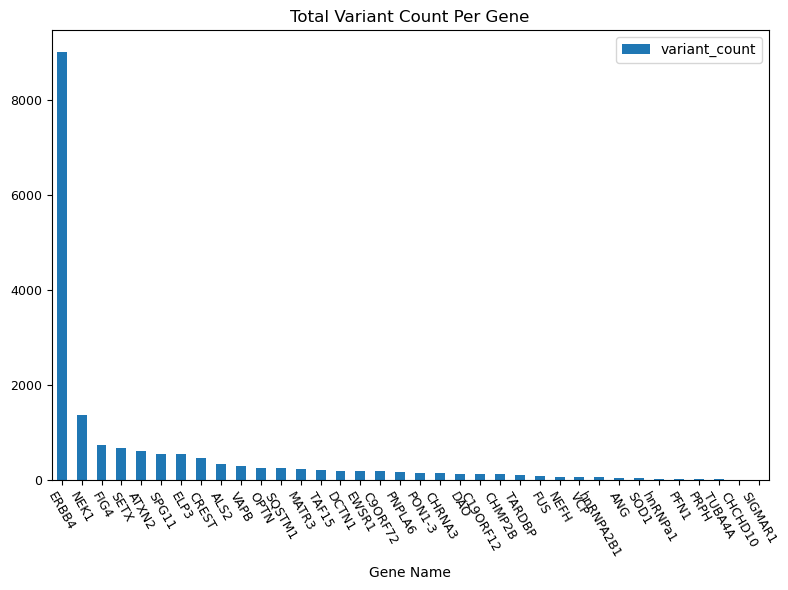

In [32]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [33]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'ATXN2']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [34]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [35]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [36]:
hdf.reset_index(inplace=True)

In [37]:
hdf.head()

,index,count
0,HG02839,2122
1,HG02805,2497
2,HG03259,2180
3,HG02703,2158
4,HG02613,2134


In [38]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(2281.2792792792793), 193.93472056203817)

## Find top and bottom genomes using mean & STD

In [39]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [40]:
len(top_genomes)

15

In [41]:
len(bottom_genomes)

17

In [42]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [43]:
sdf.head()

,HG02839,HG02805,HG03259,HG02703,HG02613,HG03024,HG03039,HG02621,HG03538,HG02852,...,HG02983,HG02562,HG03046,HG02759,HG02837,HG02634,HG02896,HG02462,HG02768,HG02814
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,36,27,20,15,5,8,38,24,15,48,...,41,6,35,7,4,33,17,4,16,7
ANG,1,9,4,11,7,6,7,0,7,7,...,11,6,0,4,7,5,7,6,4,9
ATXN2,176,179,176,24,12,161,162,12,157,13,...,19,164,25,155,156,20,18,160,159,3
C19ORF12,20,49,20,18,14,19,53,16,18,19,...,13,14,47,9,19,14,20,10,12,49
C9ORF72,11,22,0,13,28,24,24,24,10,6,...,27,29,25,3,15,13,17,18,19,7


In [44]:
tgdf= sdf.loc[top_genes]

In [45]:
tgdf_top_genomes = tgdf[top_genomes]

In [46]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [47]:
tgdf_top_genomes.head()

,HG02805,HG02808,HG02861,HG02982,HG02679,HG02890,HG02623,HG02595,HG02816,HG02884,HG02879,HG03048,HG03027,HG02571,HG02464
gene,,,,,,,,,,,,,,,
ERBB4,1322,1582,1587,1369,1459,1414,1506,1498,1407,1266,1603,1486,1467,1237,1549
NEK1,210,231,321,192,229,320,287,279,320,323,317,310,237,214,189
FIG4,86,82,72,105,95,102,92,73,93,72,96,105,71,97,96
SETX,31,59,30,23,27,92,68,57,48,41,39,56,53,79,26
ATXN2,179,173,157,170,171,15,12,155,170,167,154,18,161,172,153


In [48]:
tgdf_bot_genomes.head()

,HG02852,HG02643,HG02465,HG02589,HG03247,HG02807,HG02588,HG02757,HG02646,HG03539,HG02804,HG02810,HG02570,HG02624,HG02983,HG02837,HG02896
gene,,,,,,,,,,,,,,,,,
ERBB4,1125,972,1140,1207,1061,1188,1205,1113,1146,1130,1145,962,1229,898,1069,918,1230
NEK1,209,208,43,44,54,34,45,50,51,219,237,59,58,271,262,217,237
FIG4,70,92,109,86,86,78,56,66,57,72,58,75,48,99,94,73,110
SETX,39,37,24,46,44,44,30,69,45,44,40,44,67,77,37,28,41
ATXN2,13,11,167,21,155,153,160,171,157,8,164,16,15,16,19,156,18


## Plot stacked bar chart for top genes & top genomes

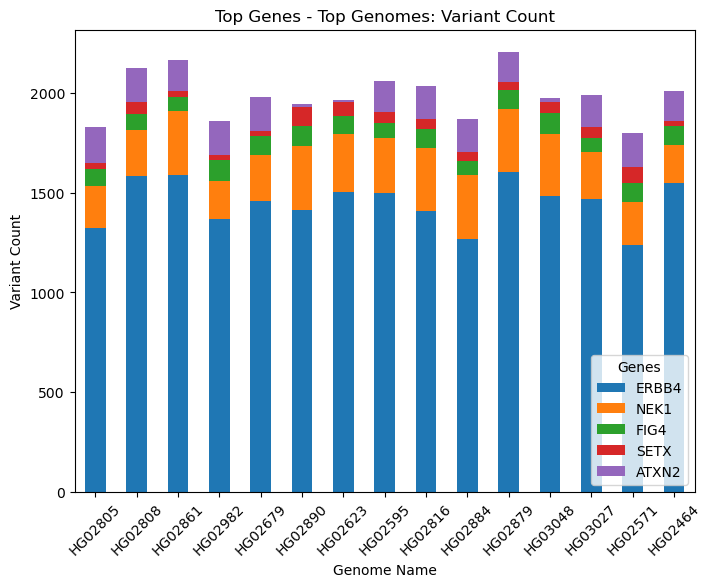

In [49]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

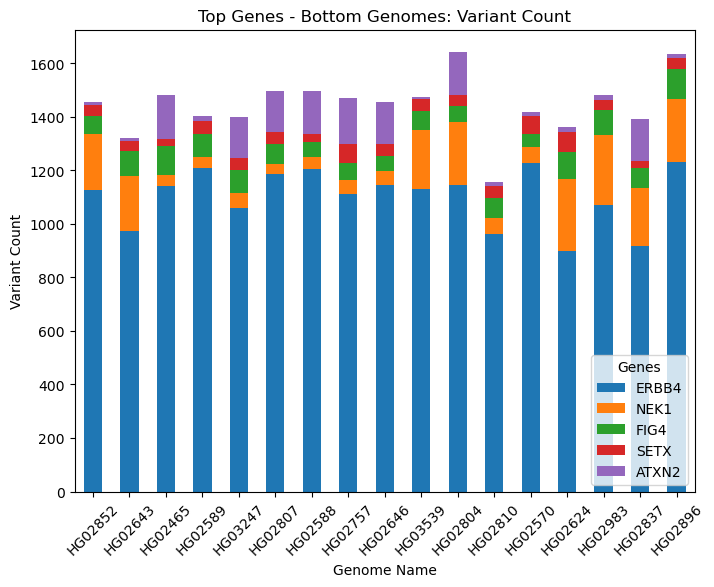

In [50]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()